### <Center> **Regression, Classification, and Ensemble Methods in Computational Intelligence** </Center> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Бібліотеки для машинного навчання
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Моделі регресії
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

# Моделі класифікації
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Моделі для ансамблю
from sklearn.ensemble import StackingRegressor


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Встановлю стиль графіків
sns.set_theme(style='whitegrid', context='notebook')

---

### <Center> **Завантаження та обробка даних** </Center> 

#### &#10140; *Читання даних*</br>

In [5]:
print(os.path.exists("customer_data.csv"))

True


In [6]:
data = pd.read_csv("customer_data.csv")

print("Розмір даних:", data.shape)
display(data.head())

Розмір даних: (1000, 8)


,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [7]:
print('columns count - ',len(data.columns), '\n')
print('columns: ',list(data.columns))

columns count -  8 

columns:  ['name', 'age', 'gender', 'education', 'income', 'country', 'purchase_frequency', 'spending']


#### &#10140;  *Очищення даних*</br>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


##### Видаляю колонку "name", яка не несе собою важливої інформації

In [9]:
data.drop(columns=["name"], inplace=True)

#### <div class="alert alert-info"> **Null Data** </div>

In [10]:
missing = list()
for x in data.columns:
    if data[x].isnull().sum() != 0:
        print(data, data[x].isnull().sum())
        missing.append(x)
    else:
        print (x + " dont have null data!")

age dont have null data!
gender dont have null data!
education dont have null data!
income dont have null data!
country dont have null data!
purchase_frequency dont have null data!
spending dont have null data!


#### ✅ *Пропущених даних немає* 

#### <div class="alert alert-info"> **Unique Data and Outliers** </div>

In [11]:
data.nunique()

age                     48
gender                   2
education                4
income                 997
country                239
purchase_frequency      10
spending              1000
dtype: int64

In [12]:
data.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


#### ✅ *Унікальних та аномальних значень не знайдено* 


#### <div class="alert alert-info"> **Категоризація** </div>

##### ***колонка - "Gender"  (One-Hot Encoding)***

In [13]:
data = pd.get_dummies(data, columns=["gender"], drop_first=True)
data["gender_Male"] = data["gender_Male"].astype(int)

In [14]:
data.head()

,age,education,income,country,purchase_frequency,spending,gender_Male
0,42,High School,53936,Slovenia,0.9,13227.120,0
1,49,Master,82468,Aruba,0.6,12674.040,0
2,55,Bachelor,56941,Cyprus,0.3,5354.115,1
3,24,Bachelor,60651,Palau,0.2,2606.510,0
4,64,Master,81884,Zambia,0.9,18984.780,1


##### ***колонка - "Education"  (Label Encoding)***

In [15]:
edu_map = {
    "High School" : 0,
    "Bachelor" : 1,
    "Master" : 2,
    "PhD" : 3
}

data["education"] = data["education"].map(edu_map)

In [16]:
data.head()

,age,education,income,country,purchase_frequency,spending,gender_Male
0,42,0,53936,Slovenia,0.9,13227.120,0
1,49,2,82468,Aruba,0.6,12674.040,0
2,55,1,56941,Cyprus,0.3,5354.115,1
3,24,1,60651,Palau,0.2,2606.510,0
4,64,2,81884,Zambia,0.9,18984.780,1


##### ***колонка - "Country"***

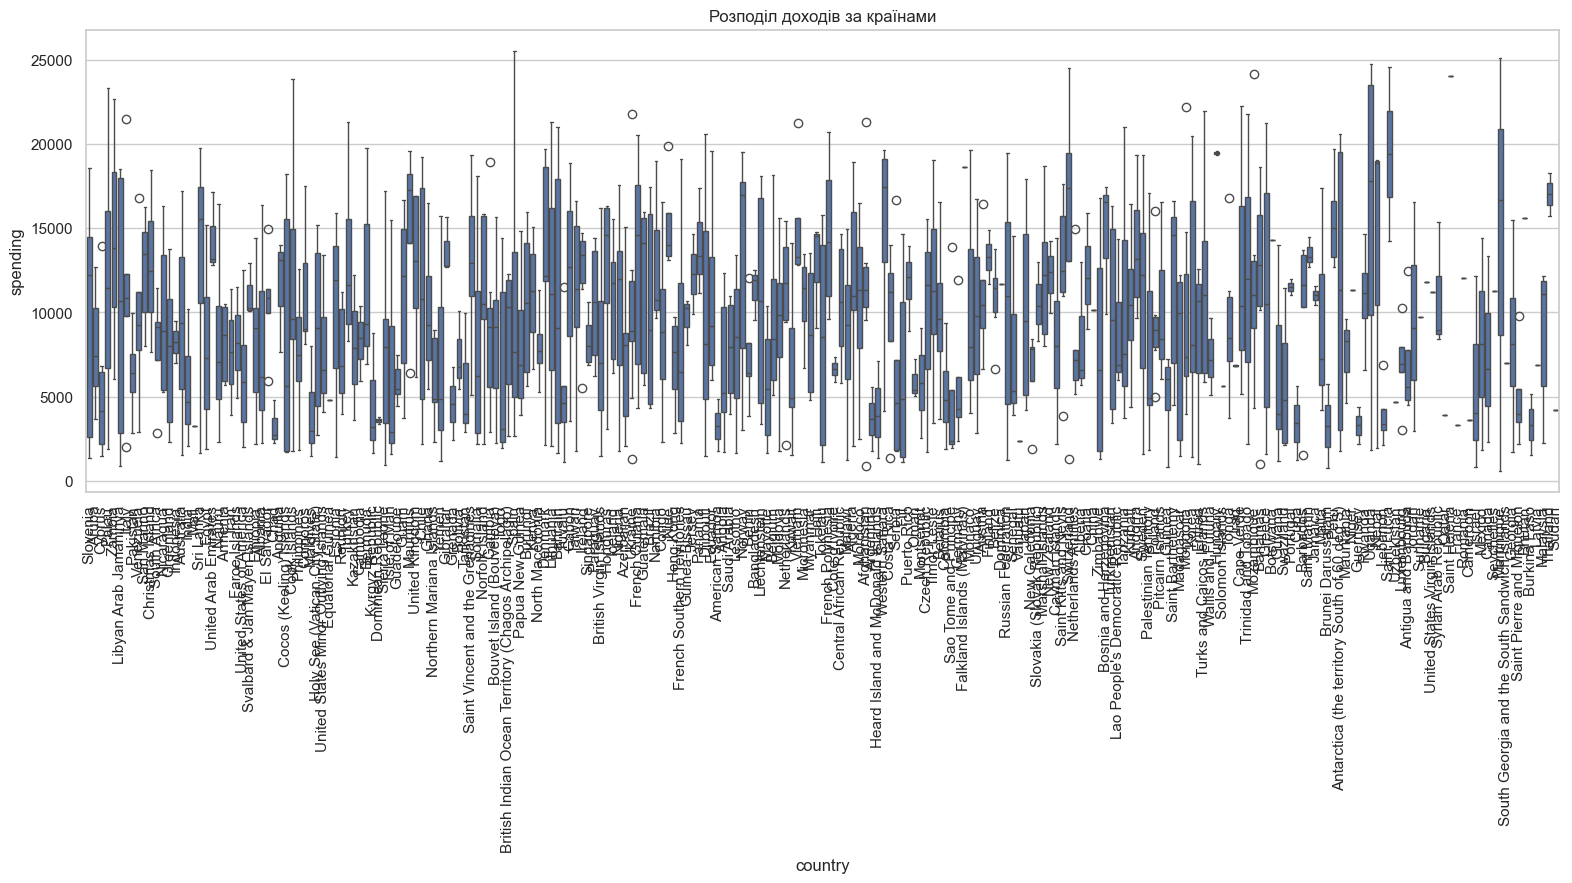

In [17]:
plt.figure(figsize=(19, 6))
sns.boxplot(x="country", y="spending", data=data)
plt.xticks(rotation=90)
plt.title("Розподіл доходів за країнами")
plt.show()

In [18]:
data.groupby("country")["spending"].mean().sort_values(ascending=False).head(10)

country
Saint Helena                   24055.78500
Hungary                        19438.79250
Saint Lucia                    19405.71500
Falkland Islands (Malvinas)    18617.12000
Thailand                       17015.41250
Bhutan                         15598.96000
Uganda                         15529.62250
Peru                           15451.08700
Niue                           15261.35125
Vietnam                        15176.63875
Name: spending, dtype: float64

In [19]:
df_encoded = pd.get_dummies(data, columns=["country"], drop_first=True)

X = df_encoded.drop(columns=["spending"])
y = df_encoded["spending"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

purchase_frequency          0.797863
education                   0.092001
age                         0.072827
income                      0.020769
gender_Male                 0.005372
country_Belize              0.000346
country_Marshall Islands    0.000307
country_Mozambique          0.000301
country_Ethiopia            0.000274
country_Cook Islands        0.000260
dtype: float64


#### <div class="alert alert-info1"> **Колонка country має велику кількість унікальних значень, але не демонструє стабільної залежності між країнами та доходом. На boxplot-графіку видно, що розподіл доходів значно перекривається між більшістю країн. Статистика середніх доходів по країнах показала високі значення лише в окремих випадках, що можуть бути випадковими через малу вибірку. Результати mutual information підтвердили, що вплив країни на дохід є мінімальним, тому ця колонка не несе корисної інформації для моделі.** </div>

In [20]:
data.drop(columns=["country"], inplace=True)

In [21]:
data.head()

,age,education,income,purchase_frequency,spending,gender_Male
0,42,0,53936,0.9,13227.120,0
1,49,2,82468,0.6,12674.040,0
2,55,1,56941,0.3,5354.115,1
3,24,1,60651,0.2,2606.510,0
4,64,2,81884,0.9,18984.780,1


#### &#10140; *Поділ даних на навчальні та тестові*</br>

In [22]:
X = data.drop("spending", axis=1)
Y= data["spending"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Тренувальні дані:", X_train.shape[0])
print("Тестові дані:", X_test.shape[0])

Тренувальні дані: 800
Тестові дані: 200


#### &#10140; *Стандартизація*</br>

In [23]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, index=X_test.index)  

---

### <Center> **Розв’язання задачі ймовірнісної регресії** </Center> 

#### &#10140; *Лінійна регресія*</br>

##### ***Отримання дочірніх інтервалів методом найменших квадратів(OLS)***

Лінійна регресія - MAE: 906.617, RMSE: 1243.185, R²: 0.949


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
521,10562.682721,109.580477,10347.581042,10777.784399,8098.390959,13026.974483
737,6722.371480,92.289113,6541.211991,6903.530968,4260.810203,9183.932756
740,5713.319773,92.127225,5532.478065,5894.161481,3251.781864,8174.857683
660,13058.342708,111.212761,12840.036928,13276.648488,10593.769201,15522.916214
411,2060.365667,116.833341,1831.026934,2289.704399,-405.209603,4525.940936


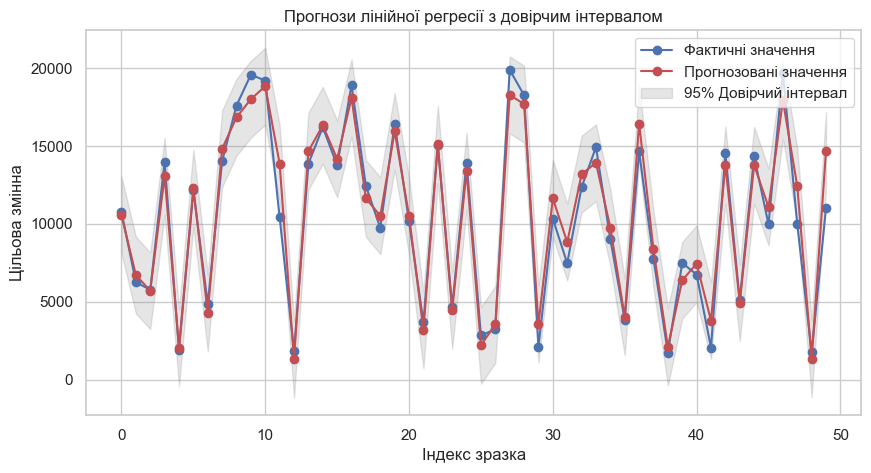

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Метрики
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Лінійна регресія - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_lr, rmse_lr, r2_lr))

# Для отримання довірчих інтервалів використаємо OLS з statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_sm).fit()
predictions_sm = ols_model.get_prediction(X_test_sm)
pred_summary = predictions_sm.summary_frame(alpha=0.05)  # 95% інтервал
display(pred_summary.head())


# Візуалізація прогнозів лінійної регресії з довірчими інтервалами для перших 50 зразків
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(y_pred_lr[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(np.arange(50), 
                 pred_summary['obs_ci_lower'][:50], 
                 pred_summary['obs_ci_upper'][:50], 
                 color='gray', alpha=0.2, label='95% Довірчий інтервал')
plt.legend()
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Прогнози лінійної регресії з довірчим інтервалом')
plt.show()


#### &#10140; *Ridge Regression*</br>

##### ***Отримання дочірніх інтервалів методом найменших квадратів(Bootstrap)***

      Actual     Predicted  Lower Bound (95%)  Upper Bound (95%)
0  10765.200  10562.665220       10376.433855       10775.357809
1   6264.510   6722.408111        6517.660338        6936.179223
2   5771.985   5713.368317        5532.405777        5894.902818
3  13975.220  13058.303023       12855.839220       13249.055171
4   1924.700   2060.464947        1799.366547        2322.076252
Ridge Regression - MAE: 906.614, RMSE: 1243.174, R²: 0.949


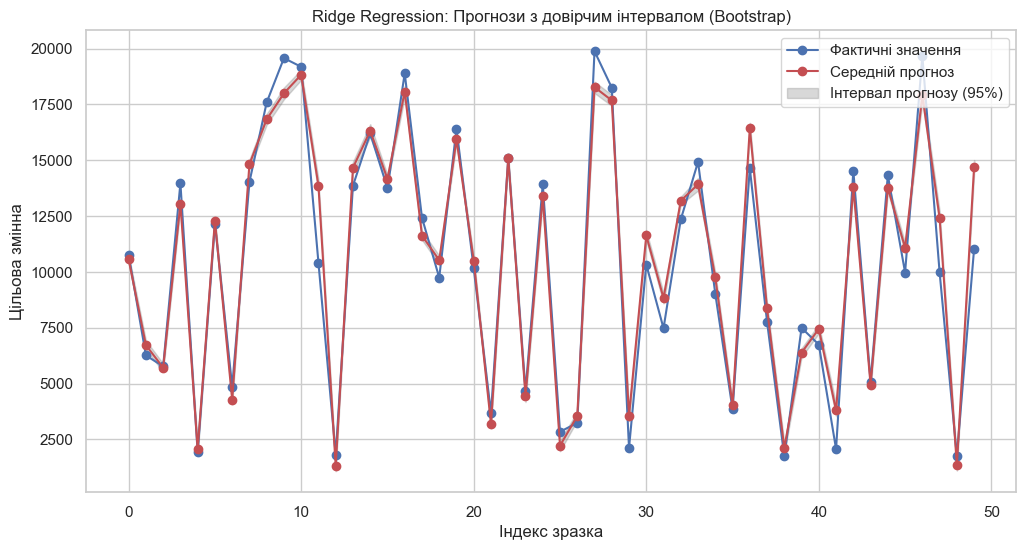

Скільки значень потрапило в інтервал: 38
Загальна кількість: 200
Покриття інтервалом: 19.000%


In [25]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample


alpha_search = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
alpha_search.fit(X_train_scaled, y_train)
best_alpha = alpha_search.alpha_

# Bootstrap з фіксованим alpha
n_iterations = 900
predictions = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train_scaled, y_train, random_state=i)
    rr_boot = Ridge(alpha=best_alpha)
    rr_boot.fit(X_resampled, y_resampled)
    y_pred_i = rr_boot.predict(X_test_scaled)
    predictions.append(y_pred_i)

predictions = np.array(predictions)

# Квантилі
lower_bounds = np.percentile(predictions, 2.5, axis=0)
upper_bounds = np.percentile(predictions, 97.5, axis=0)

rr_final = Ridge(alpha=best_alpha)
rr_final.fit(X_train_scaled, y_train)
y_pred_rr = rr_final.predict(X_test_scaled)

# Таблиця результатів
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rr,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df.head(5))

# Метрики
mae_rr = mean_absolute_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mean_squared_error(y_test, y_pred_rr))
r2_rr = r2_score(y_test, y_pred_rr)
print("Ridge Regression - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_rr, rmse_rr, r2_rr))

# Візьмемо перші 50 зразків
indices = np.arange(50)

# Діапазони (інтервали)
y_pred_min = lower_bounds
y_pred_max = upper_bounds

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred_rr[:50], 'ro-', label='Середній прогноз')
plt.fill_between(indices, y_pred_min[:50], y_pred_max[:50], color='gray', alpha=0.3, label='Інтервал прогнозу (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Ridge Regression: Прогнози з довірчим інтервалом (Bootstrap)')
plt.legend()
plt.grid(True)
plt.show()


results_df["Inside Interval"] = (
    (results_df["Actual"] >= results_df["Lower Bound (95%)"]) &
    (results_df["Actual"] <= results_df["Upper Bound (95%)"])
)

print("Скільки значень потрапило в інтервал:", results_df["Inside Interval"].sum())
print("Загальна кількість:", len(results_df))

inside_count = results_df["Inside Interval"].sum()
total = len(results_df)
coverage = inside_count / total
print(f"Покриття інтервалом: {coverage:.3%}")

---


### <Center> **Дослідження ансамблевих методів** </Center> 

#### &#10140; *Random Forest and Mapie(Bagging)*</br>

Ridge Regression - MAE: 562.260, RMSE: 749.947, R²: 0.981
      Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0  10765.200  10796.3255          9039.8888         12527.3835
1   6264.510   5882.7936          4279.8323          7754.4955
2   5771.985   5641.3755          3977.7516          7489.7679
3  13975.220  13883.2065         11991.0285         15481.2553
4   1924.700   1962.5982           196.1149          3670.5638


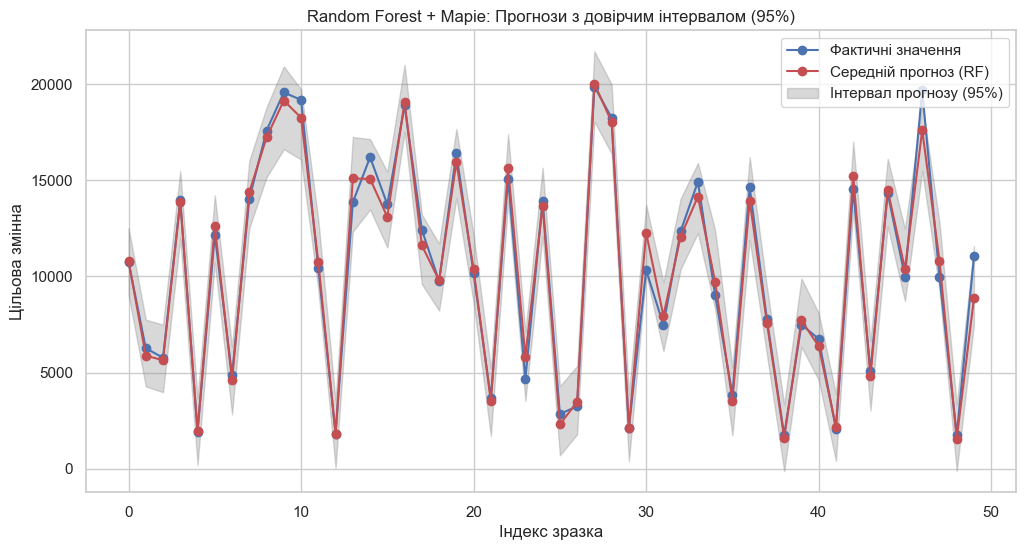

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from mapie.regression import MapieRegressor

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

# Крок 2: MAPIE з оптимізованим RandomForest
mapie = MapieRegressor(estimator=best_rf, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)


lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

print("Ridge Regression - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_rf, rmse_rf, r2_rf))

results_rf_optimized = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_rf_optimized.head(5))

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Середній прогноз (RF)')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал прогнозу (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Random Forest + Mapie: Прогнози з довірчим інтервалом (95%)')
plt.legend()
plt.grid(True)
plt.show()

#### &#10140; *XGBoost and Mapie(Boosting)*</br>

      Actual     Predicted  Lower Bound (95%)  Upper Bound (95%)
0  10765.200  10915.437500       10071.928984       11411.564219
1   6264.510   6160.578613        5413.804980        6792.920801
2   5771.985   5699.510254        5004.809336        6330.594375
3  13975.220  13806.558594       13183.821875       14539.289492
4   1924.700   2054.935547        1449.134087        2780.408125
XGBoost - MAE: 239.991, RMSE: 322.043, R²: 0.997


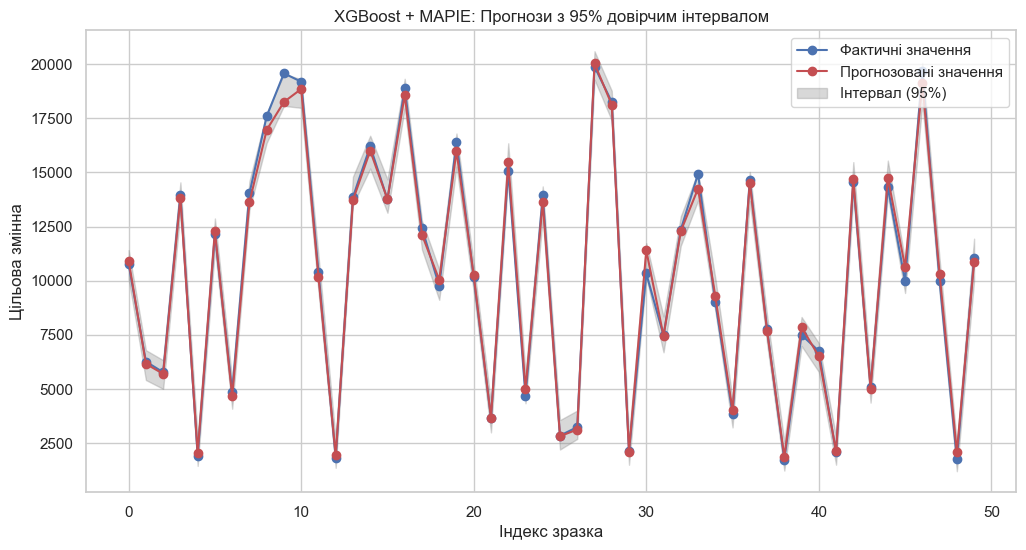

Скільки значень потрапило в інтервал: 196
Загальна кількість: 200


In [27]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_

# MAPIE
mapie = MapieRegressor(estimator=best_xgb, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# Межі інтервалу
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# Метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

# Таблиця результатів
results_df_gxb = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df_gxb.head(5))
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae, rmse, r2))

# Візуалізація
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('XGBoost + MAPIE: Прогнози з 95% довірчим інтервалом')
plt.legend()
plt.grid(True)
plt.show()

results_df_gxb["Inside Interval"] = (
    (results_df_gxb["Actual"] >= results_df_gxb["Lower Bound (95%)"]) &
    (results_df_gxb["Actual"] <= results_df_gxb["Upper Bound (95%)"])
)

print("Скільки значень потрапило в інтервал:", results_df_gxb["Inside Interval"].sum())
print("Загальна кількість:", len(results_df_gxb))


#### &#10140; DecisionTreeRegressor & RandomForestRegressor & GradientBoostingRegressor & XGBRegressor (метамодель) (Stacking)*</br>

      Actual     Predicted  Lower Bound (95%)  Upper Bound (95%)
0  10765.200  10718.973633        9768.344922       11616.953086
1   6264.510   5860.407715        5059.184199        6802.509082
2   5771.985   5532.155762        4897.901055        6693.425996
3  13975.220  13523.016602       12301.025977       14547.897461
4   1924.700   1934.569458        1115.160010        2824.891182
Скільки значень потрапило в інтервал: 199
Загальна кількість: 200
Відсоток покриття інтервалом: 99.50%
XGBoost - MAE: 336.387, RMSE: 449.464, R²: 0.993


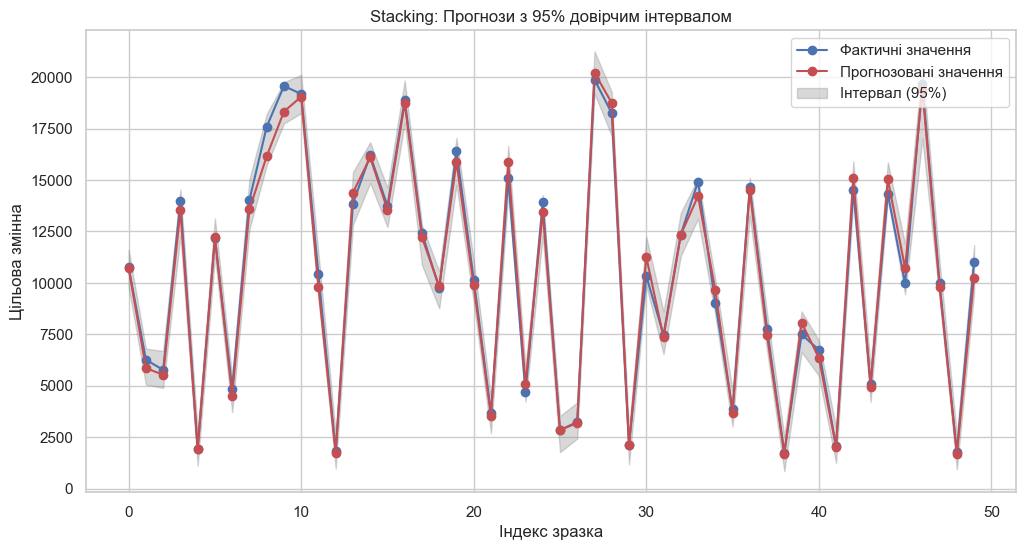

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Підбір для RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_

# Підбір для DecisionTreeRegressor
tree_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 6]
}
tree_search = GridSearchCV(DecisionTreeRegressor(), tree_param_grid, cv=5)
tree_search.fit(X_train_scaled, y_train)
best_tree = tree_search.best_estimator_

# Підбір для GradientBoostingRegressor
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
gb_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5)
gb_search.fit(X_train_scaled, y_train)
best_gb = gb_search.best_estimator_

# Підбір для XGBRegressor (метамодель)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
xgb_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_

# Побудова стеку з новими базовими моделями
base_models = [
    ('rf', best_rf),
    ('tree', best_tree),
    ('gb', best_gb)
]

stack_optimized = StackingRegressor(
    estimators=base_models,
    final_estimator=best_xgb,
    cv=5
)

# Навчання стеку
stack_optimized.fit(X_train_scaled, y_train)
y_pred = stack_optimized.predict(X_test_scaled)

# Метрики
mae_opt = mean_absolute_error(y_test, y_pred)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred))
r2_opt = r2_score(y_test, y_pred)

# Обгортка стеку в Mapie для побудови довірчих інтервалів
mapie = MapieRegressor(estimator=stack_optimized, method="plus")
mapie.fit(X_train_scaled, y_train)

# Прогноз з довірчими межами (95%)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# Межі інтервалу
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# Таблиця з інтервалами
results_mapie_stack = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})

print(results_mapie_stack.head(5))

# Чи потрапляє фактичне значення в інтервал
results_mapie_stack["Inside Interval"] = (
    (results_mapie_stack["Actual"] >= results_mapie_stack["Lower Bound (95%)"]) &
    (results_mapie_stack["Actual"] <= results_mapie_stack["Upper Bound (95%)"])
)
print("Скільки значень потрапило в інтервал:", results_mapie_stack["Inside Interval"].sum())
print("Загальна кількість:", len(results_mapie_stack))

coverage = (results_mapie_stack["Inside Interval"].sum() / len(results_mapie_stack)) * 100
print(f"Відсоток покриття інтервалом: {coverage:.2f}%")


# Метрики
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_opt, rmse_opt, r2_opt))

# Візуалізація
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Stacking: Прогнози з 95% довірчим інтервалом')
plt.legend()
plt.grid(True)
plt.show()

---

### <Center> **Перехід від регресії до класифікації** </Center> 

#### &#10140; Дискретизація (cut)</br>

In [29]:
bins = [500, 5000, 10000, 15000, 30000]

data["spending_class"] = pd.cut(data["spending"], bins=bins, labels=False)
data["spending_class"].value_counts()

spending_class
1    292
2    276
0    249
3    183
Name: count, dtype: int64

##### ***Розділення вибірки, стандартизація та заповнення синтетичними даними***

In [30]:
# Розбиваємо X та y
X = data.drop(columns=['spending', 'spending_class'])
y = data['spending_class']

# Train-test split
X_train_clasify_cut, X_test_clasify_cut, y_train_clasify_cut, y_test_clasify_cut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_cut = scaler.fit_transform(X_train_clasify_cut)
X_test_clasify_scaled_cut = scaler.transform(X_test_clasify_cut)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clasify_scaled_cut, y_train_clasify_cut)

##### ***Перевірка розповідлу після синтезації***

Розподіл класів після SMOTE: {np.int64(0): np.int64(219), np.int64(1): np.int64(219), np.int64(2): np.int64(219), np.int64(3): np.int64(219)}


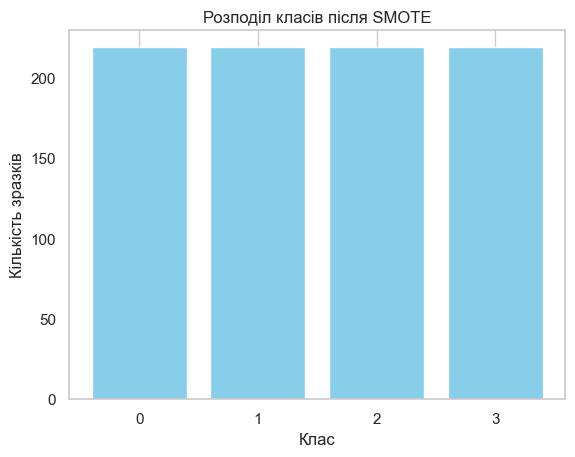

In [31]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Розподіл класів після SMOTE:", class_distribution)

import matplotlib.pyplot as plt

plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title("Розподіл класів після SMOTE")
plt.xlabel("Клас")
plt.ylabel("Кількість зразків")
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y')
plt.show()

##### ***Класифікація XGBoost***

In [32]:
xgb_clf_cut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_cut.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        62
           1       0.80      0.86      0.83        73
           2       0.86      0.86      0.86        69
           3       0.93      0.93      0.93        46

    accuracy                           0.87       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.87      0.87       250

Confusion Matrix:
[[53  9  0  0]
 [ 3 63  7  0]
 [ 0  7 59  3]
 [ 0  0  3 43]]


##### ***Класифікація DecisionTreeClassifier***

In [33]:
param_grid_cut = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_cut = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_cut,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search_cut.fit(X_train_resampled, y_train_resampled)
best_tree_cut = grid_search_cut.best_estimator_
y_pred_tree_cut = best_tree_cut.predict(X_test_clasify_scaled_cut)

print("\n📋 Classification Report (Decision Tree, cut, після оптимізації):")
print(classification_report(y_test_clasify_cut, y_pred_tree_cut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_tree_cut))


📋 Classification Report (Decision Tree, cut, після оптимізації):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        62
           1       0.79      0.84      0.81        73
           2       0.80      0.80      0.80        69
           3       0.88      0.78      0.83        46

    accuracy                           0.83       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

📊 Confusion Matrix:
[[55  7  0  0]
 [ 8 61  4  0]
 [ 0  9 55  5]
 [ 0  0 10 36]]


#### &#10140; Дискретизація (qcut)</br>

In [34]:
bins = 5

data["spending_class"] = pd.qcut(data["spending"], q=bins, labels=False)
data["spending_class"].value_counts()

spending_class
3    200
1    200
0    200
4    200
2    200
Name: count, dtype: int64

##### ***Розділення вибірки, стандартизація та заповнення синтетичними даними***

In [35]:
# Розбиваємо X та y
X = data.drop(columns=['spending', 'spending_class'])
y = data['spending_class']

# Train-test split
X_train_clasify_qcut, X_test_clasify_qcut, y_train_clasify_qcut, y_test_clasify_qcut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_qcut = scaler.fit_transform(X_train_clasify_qcut)
X_test_clasify_scaled_qcut = scaler.transform(X_test_clasify_qcut)

##### ***Класифікація XGBoost*** 

In [36]:
xgb_clf_qcut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_qcut.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
y_pred_xgb_qcut = xgb_clf_qcut.predict(X_test_clasify_scaled_qcut)

print("XGBoost — Classification Report:")
print(classification_report(y_test_clasify_qcut, y_pred_xgb_qcut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_xgb_qcut))

XGBoost — Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.82      0.80      0.81        50
           2       0.74      0.84      0.79        50
           3       0.75      0.76      0.75        50
           4       0.89      0.82      0.85        50

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.83       250
weighted avg       0.83      0.82      0.83       250

Confusion Matrix:
[[45  5  0  0  0]
 [ 2 40  8  0  0]
 [ 0  4 42  4  0]
 [ 0  0  7 38  5]
 [ 0  0  0  9 41]]


##### ***Класифікація DecisionTreeClassifier*** 

In [37]:
# Гіперпараметри для оптимізації
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
best_tree = grid_search.best_estimator_
y_pred_tree_qcut = best_tree.predict(X_test_clasify_scaled_qcut)

print("\n📋 Decision Tree — Classification Report (після оптимізації):")
print(classification_report(y_test_clasify_qcut, y_pred_tree_qcut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_tree_qcut))


📋 Decision Tree — Classification Report (після оптимізації):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        50
           1       0.75      0.80      0.78        50
           2       0.70      0.76      0.73        50
           3       0.64      0.68      0.66        50
           4       0.88      0.70      0.78        50

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

📊 Confusion Matrix:
[[45  5  0  0  0]
 [ 5 40  5  0  0]
 [ 0  8 38  4  0]
 [ 0  0 11 34  5]
 [ 0  0  0 15 35]]


---

### <Center> **Дослідження розподілу ймовірностей у класифікації** </Center> 

#### &#10140; Розподіл ймовірностей передбачень для кожного класу</br>

In [38]:
probs_tree = best_tree_cut.predict_proba(X_test_clasify_scaled_cut)
logits_xgb = xgb_clf_cut.predict_proba(X_test_clasify_scaled_cut)

In [39]:
# Обчислюємо максимум імовірності по класах
max_probs_tree = np.max(probs_tree, axis=1)
max_probs_xgb = np.max(logits_xgb, axis=1)

max_probs_tree[:100], max_probs_xgb[:5]

(array([1.        , 0.93333333, 1.        , 1.        , 0.95454545,
        0.95454545, 0.875     , 0.96774194, 1.        , 1.        ,
        1.        , 0.93333333, 1.        , 1.        , 1.        ,
        0.95454545, 1.        , 0.96774194, 1.        , 1.        ,
        0.93333333, 1.        , 0.93333333, 0.95454545, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.95238095, 1.        , 1.        , 0.84615385, 1.        ,
        0.84615385, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.93333333, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.94444444, 1.        , 0.96774194, 1.        , 1.        ,
        0.5       , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.84615385, 1.        , 1.        , 0.5       ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.8       , 1.  

In [40]:
# Для Decision Tree
probs_tree_df = pd.DataFrame(probs_tree, columns=[f"Class {i}" for i in range(probs_tree.shape[1])])
probs_tree_df["Predicted Class"] = np.argmax(probs_tree, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df.head())


Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Predicted Class
0,0.0,0.000000,0.000000,1.000000,3
1,0.0,0.050000,0.933333,0.016667,2
2,0.0,1.000000,0.000000,0.000000,1
3,1.0,0.000000,0.000000,0.000000,0
4,0.0,0.045455,0.954545,0.000000,2


In [41]:
# Для XGBoost
probs_xgb_df = pd.DataFrame(logits_xgb, columns=[f"Class {i}" for i in range(logits_xgb.shape[1])])
probs_xgb_df["Predicted Class"] = np.argmax(logits_xgb, axis=1)
print("Ймовірності для XGBoost:")
display(probs_xgb_df.head())

Ймовірності для XGBoost:


,Class 0,Class 1,Class 2,Class 3,Predicted Class
0,0.000086,0.000085,0.027124,0.972705,3
1,0.000302,0.000526,0.976349,0.022823,2
2,0.645546,0.351856,0.001998,0.000600,0
3,0.977995,0.001193,0.013957,0.006855,0
4,0.001242,0.005203,0.993218,0.000337,2


#### &#10140; Гістограма ймовірностей, щоб побачити впевненість моделі</br>

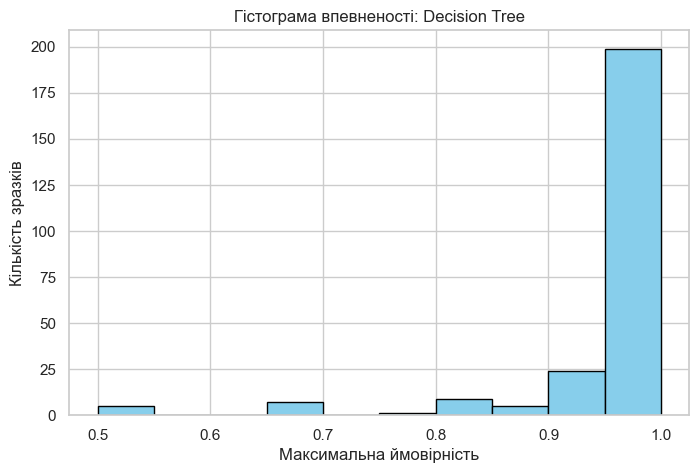

In [42]:
# Отримуємо максимальну ймовірність для кожного зразка
max_probs_tree = np.max(probs_tree, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

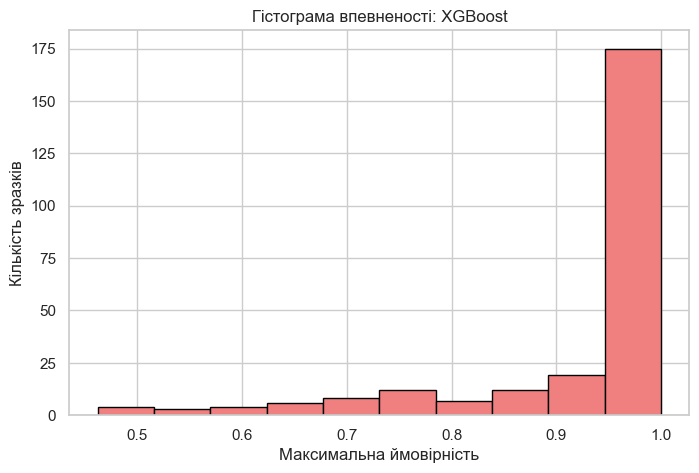

In [43]:
# Отримуємо максимальну ймовірність для кожного зразка
max_probs_xgb = np.max(logits_xgb, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_xgb, bins=10, color='lightcoral', edgecolor='black')
plt.title("Гістограма впевненості: XGBoost")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()


Дослідити, як змінюється розподіл при overfitting та underfitting

In [44]:
# Явно перенавчена модель
overfitted_tree = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Навчання
overfitted_tree.fit(X_train_resampled, y_train_resampled)

# Передбачення
y_pred_overfitted = overfitted_tree.predict(X_test_clasify_scaled_cut)

# Метрики
print("\n📋 Classification Report (Overfitted Decision Tree):")
print(classification_report(y_test_clasify_cut, y_pred_overfitted))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_overfitted))


📋 Classification Report (Overfitted Decision Tree):
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        62
           1       0.74      0.88      0.81        73
           2       0.78      0.77      0.77        69
           3       0.90      0.76      0.82        46

    accuracy                           0.82       250
   macro avg       0.83      0.81      0.82       250
weighted avg       0.82      0.82      0.82       250

📊 Confusion Matrix:
[[52 10  0  0]
 [ 5 64  4  0]
 [ 0 12 53  4]
 [ 0  0 11 35]]


In [45]:
# Недонавчена модель
underfitted_tree = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Навчання
underfitted_tree.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)

# Передбачення
y_pred_underfitted = underfitted_tree.predict(X_test_clasify_scaled_qcut)

# Метрики
print("\n📋 Decision Tree — Classification Report (Underfitted модель):")
print(classification_report(y_test_clasify_qcut, y_pred_underfitted))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_underfitted))


📋 Decision Tree — Classification Report (Underfitted модель):
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        50
           1       0.49      0.76      0.59        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        50
           4       0.38      1.00      0.55        50

    accuracy                           0.50       250
   macro avg       0.36      0.50      0.40       250
weighted avg       0.36      0.50      0.40       250

📊 Confusion Matrix:
[[38 11  0  0  1]
 [ 3 38  0  0  9]
 [ 0 25  0  0 25]
 [ 0  4  0  0 46]
 [ 0  0  0  0 50]]


In [46]:
probs_tree_overfitted = overfitted_tree.predict_proba(X_test_clasify_scaled_cut)
probs_tree_underfitted = underfitted_tree.predict_proba(X_test_clasify_scaled_cut)
# Обчислюємо максимум імовірності по класах
max_probs_tree_overfitted = np.max(probs_tree_overfitted, axis=1)
max_probs_underfitted = np.max(probs_tree_underfitted, axis=1)


max_probs_tree_overfitted[:20], max_probs_underfitted[:20] 

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([0.38860104, 0.38860104, 0.57603687, 0.73170732, 0.38860104,
        0.38860104, 0.38860104, 0.38860104, 0.38860104, 0.57603687,
        0.57603687, 0.38860104, 0.57603687, 0.38860104, 0.38860104,
        0.38860104, 0.38860104, 0.57603687, 0.57603687, 0.98113208]))

In [47]:
# Для Decision Tree overfitted
probs_tree_df_overfitted = pd.DataFrame(probs_tree_overfitted, columns=[f"Class {i}" for i in range(probs_tree_overfitted.shape[1])])
probs_tree_df_overfitted["Predicted Class"] = np.argmax(probs_tree_overfitted, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df_overfitted.head())

Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Predicted Class
0,0.0,0.0,0.0,1.0,3
1,0.0,0.0,1.0,0.0,2
2,0.0,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,2


In [48]:
# Для Decision Tree underfitted
probs_tree_df_underfitted = pd.DataFrame(probs_tree_underfitted, columns=[f"Class {i}" for i in range(probs_tree_underfitted.shape[1])])
probs_tree_df_underfitted["Predicted Class"] = np.argmax(probs_tree_underfitted, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df_underfitted.head())

Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Class 4,Predicted Class
0,0.002591,0.031088,0.215026,0.362694,0.388601,4
1,0.002591,0.031088,0.215026,0.362694,0.388601,4
2,0.069124,0.576037,0.308756,0.046083,0.000000,1
3,0.731707,0.268293,0.000000,0.000000,0.000000,0
4,0.002591,0.031088,0.215026,0.362694,0.388601,4


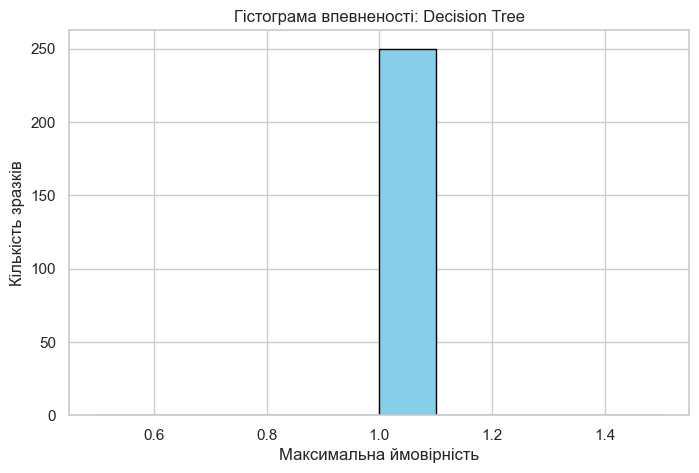

In [49]:
# Отримуємо максимальну ймовірність для кожного зразка overfitted
max_probs_tree = np.max(probs_tree_overfitted, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

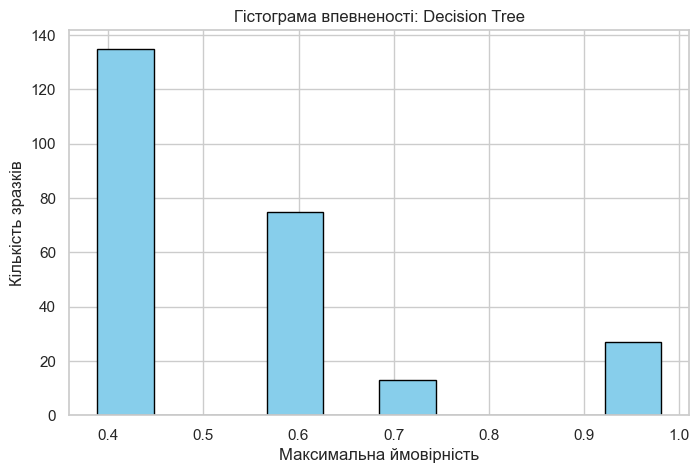

In [50]:
# Отримуємо максимальну ймовірність для кожного зразка underfitted
max_probs_tree = np.max(probs_tree_underfitted, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_clf_cut = XGBClassifier(
    n_estimators=150,        # кількість дерев
    max_depth=4,             # глибина кожного дерева
    learning_rate=0.1,       # швидкість навчання
    subsample=0.8,           # частина даних для кожного дерева (допомагає уникнути overfitting)
    colsample_bytree=0.8,    # частка ознак для кожного дерева
    gamma=1,                 # мінімальна втрата для розгалуження
    reg_alpha=0.1,           # L1-регуляризація
    reg_lambda=1,            # L2-регуляризація
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Навчання
xgb_clf_cut.fit(X_train_clasify_scaled_cut, y_train_clasify_cut)

# Передбачення
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

# Метрики
print("📋 XGBoost — Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

📋 XGBoost — Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        62
           1       0.78      0.86      0.82        73
           2       0.84      0.88      0.86        69
           3       0.93      0.91      0.92        46

    accuracy                           0.86       250
   macro avg       0.88      0.86      0.87       250
weighted avg       0.87      0.86      0.86       250

📊 Confusion Matrix:
[[49 13  0  0]
 [ 2 63  8  0]
 [ 0  5 61  3]
 [ 0  0  4 42]]


---

### <Center> **Перетворення метрик між регресією та класифікацією** </Center> 

In [60]:
# Припустимо, у тебе 5 класів (0-4)
n_classes = 4
max_possible_error = n_classes - 1

# Маємо передбачення класів і справжні класи
y_true_class = y_test_clasify_cut
y_pred_class = y_pred_xgb_cut

# Обчислимо MAE між класами
mae_class = np.mean(np.abs(y_true_class - y_pred_class))

# Оцінимо приблизну accuracy
approx_accuracy = 1 - (mae_class / max_possible_error)
print(f"MAE (між класами): {mae_class:.4f}")
print(f"Approx Accuracy через MAE: {approx_accuracy:.4f}")

accuracy = accuracy_score(y_true_class, y_pred_class)
approx_mae = (1 - accuracy) * max_possible_error

print(f"Accuracy: {accuracy:.4f}")
print(f"Approx MAE через Accuracy: {approx_mae:.4f}")

MAE (між класами): 0.1400
Approx Accuracy через MAE: 0.9533
Accuracy: 0.8600
Approx MAE через Accuracy: 0.4200


In [62]:
from sklearn.preprocessing import KBinsDiscretizer
# Кількість класів (наприклад, 5 — як ти вже використовував)
n_bins = 4

# Ініціалізація та навчання дискретизатора на справжніх значеннях
kbin = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
kbin.fit(y_test.values.reshape(-1, 1))

# Дискретизація передбачених регресією значень
y_pred_binned = kbin.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# Дискретизація істинних значень
y_true_binned = kbin.transform(y_test.values.reshape(-1, 1)).astype(int).flatten()

accuracy = accuracy_score(y_true_binned, y_pred_binned)
print(f"Accuracy між істинними класами та передбаченими з регресії: {accuracy:.4f}")

Accuracy між істинними класами та передбаченими з регресії: 0.9350


In [65]:
bin_means = {}
for cls in np.unique(y_true_binned):
    bin_means[cls] = y_test[y_true_binned == cls].mean()

print("Середні значення цільової змінної для кожного класу:")
for k, v in bin_means.items():
    print(f"Клас {k}: {v:.2f}")

# Замінюємо передбачені класи на середнє значення відповідного класу
y_pred_avg = np.array([bin_means[cls] for cls in y_pred_binned])

# Обчислюємо MAE між цими "середніми" прогнозами і справжніми значеннями
mae_avg = mean_absolute_error(y_test, y_pred_avg)
print(f"\nMAE через середні значення класів: {mae_avg:.4f}")

Середні значення цільової змінної для кожного класу:
Клас 0: 2701.71
Клас 1: 7754.81
Клас 2: 11937.95
Клас 3: 17004.01

MAE через середні значення класів: 1302.8241
